In [1]:
!pip install --upgrade kagglehub
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Download latest version
path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dileep070/heart-disease-prediction-using-logistic-regression/versions/1


In [3]:
# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


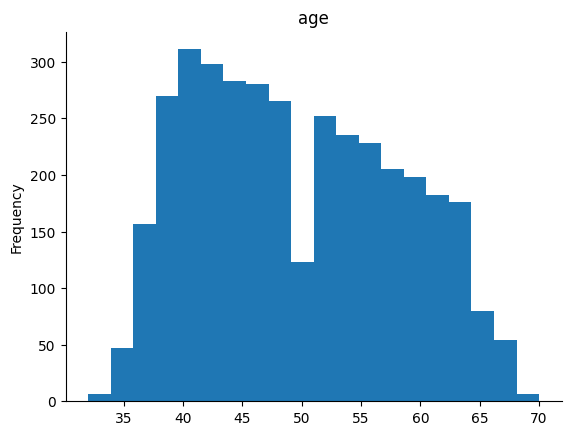

In [10]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Feature Selection and Splitting

In [11]:
# Assuming 'TenYearCHD' is the target column
y = df['TenYearCHD'].values
X = df.drop(columns=['TenYearCHD']).values

In [12]:
# Standardize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [13]:
# Add bias term (column of ones)
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [37]:
# Split into training and test sets
np.random.seed(76)
shuffle_indices = np.random.permutation(X.shape[0])
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[shuffle_indices[:split_index]], X[shuffle_indices[split_index:]]
y_train, y_test = y[shuffle_indices[:split_index]], y[shuffle_indices[split_index:]]


## Logistic Regression Implementation from Scratch

In [38]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        losses = []
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            gradient = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * np.mean(y_pred - y)
            loss = self.loss(y, y_pred)
            losses.append(loss)
        return losses

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.round(y_pred)



In [39]:
model = LogisticRegressionGD(learning_rate=0.001, num_iterations=10000)
losses = model.fit(X_train, y_train)

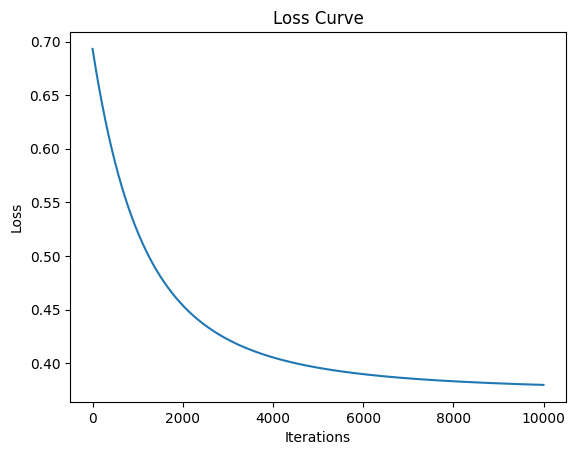

In [40]:
# Plotting the loss curve
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [41]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)

    accuracy = np.mean(y_pred == y) * 100
    false_negatives = np.sum((y_pred == 0) & (y == 1)) / np.sum(y == 1) * 100
    false_positives = np.sum((y_pred == 1) & (y == 0)) / np.sum(y == 0) * 100

    return accuracy, false_negatives, false_positives

In [42]:
# Training set evaluation
train_acc, train_fn, train_fp = evaluate_model(model, X_train, y_train)
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Training False Negatives: {train_fn:.2f}%")
print(f"Training False Positives: {train_fp:.2f}%")

# Test set evaluation
test_acc, test_fn, test_fp = evaluate_model(model, X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"Test False Negatives: {test_fn:.2f}%")
print(f"Test False Positives: {test_fp:.2f}%")

Training Accuracy: 85.23%
Training False Negatives: 95.50%
Training False Positives: 0.32%
Test Accuracy: 84.84%
Test False Negatives: 96.46%
Test False Positives: 0.32%
